### Import library

- install PyTorch versi 1.4 dan TorchVision 0.5 agar transformasi dataset tidak error
- split_folders untuk melakukan split gambar dataset
https://pypi.org/project/split-folders/

In [0]:
!pip install split_folders
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 19kB/s 
     |████████████████████████████████| 4.0MB 46.8MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
from pathlib import Path
import split_folders

### Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Download Dataset

In [0]:
!wget ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip -P '/content/'

--2020-05-13 00:44:43--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘/content/cell_images.zip’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip     100%[===================>] 337.08M  15.4MB/s    in 23s     

2020-05-13 00:45:09 (14.5 MB/s) - ‘/content/cell_images.zip’ saved [353452851]



### Unzip cell images dataset 

In [0]:
!unzip '/content/cell_images.zip' -d '/content/' 

Streaming output truncated to the last 5000 lines.
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: /content/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: /content/cell_images/Uninfected/C236T

### Split Dataset

In [0]:
split_folders.ratio('/content/cell_images',
                    output="output", 
                    seed=1337, 
                    ratio=(.8, .1, .1))

Copying files: 27560 files [00:04, 6117.89 files/s]


### Mendefinisikan variabel Path dari dataset (train,test,valid)

In [0]:
PATH = Path('/content/gdrive/My Drive/Malaria/')
output = Path('/content/output')

### Load & Transformasi Dataset

load dataset menggunakan ImageDataBunch dari folder dataset yang sebelumnya sudah dipisahkan berdasarkan porsi dataset(train 80%,test & valid masing - masing 10%), dataset di-transformasi diputar segala arah secara vertikal, horizontal dan 90 derajat dari citra asli dan diubah menjadi ukuran 224x224, batch size = 64

In [0]:
data = ImageDataBunch.from_folder(output,
                                  train="train",
                                  test="test", 
                                  valid="val", 
                                  ds_tfms=get_transforms(
                                      do_flip = True,
                                      flip_vert = True, 
                                      max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=1).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (22046 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: /content/output;

Valid: LabelList (2756 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: /content/output;

Test: LabelList (2756 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/output

### Melihat dataset yang sudah di-load beserta label-nya

Classes: 
 ['Parasitized', 'Uninfected']


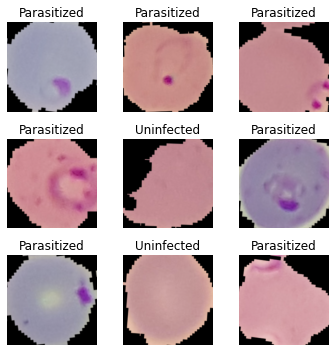

In [0]:
print(f'Classes: \n {data.classes}')
data.show_batch(rows=3, figsize=(5,5))

### Mendefinisikan model ResNet34

Melatih model menggunakan fungsi fit one cycle (https://docs.fast.ai/basic_train.html#fit_one_cycle)

In [0]:
model = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


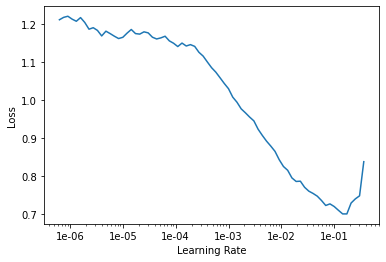

In [0]:
model.lr_find()
model.recorder.plot()

In [0]:
lr = 0.01

In [0]:
model.fit_one_cycle(4,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.232736,0.151463,0.946662,1:57:50
1,0.159204,0.138497,0.951016,1:58:32
2,0.139438,0.103980,0.961176,1:58:03
3,0.126587,0.104222,0.961176,1:58:36


In [0]:
model.save('/content/gdrive/My Drive/Malaria/stage1-exp2')

In [0]:
model.load('/content/gdrive/My Drive/Malaria/stage1-exp2')

In [0]:
model.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


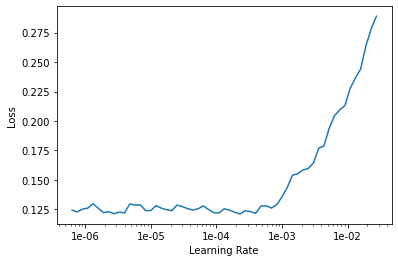

In [0]:
model.lr_find()
model.recorder.plot()

In [0]:
lr = 0.01

In [0]:
model.fit_one_cycle(4,slice(1e-4,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.155301,0.138764,0.950653,2:00:44
1,0.135647,0.111111,0.962990,2:00:49
2,0.105639,0.089786,0.969158,2:00:20
3,0.099183,0.083092,0.969158,2:00:54


In [0]:
model.unfreeze()

In [0]:
model.save('/content/gdrive/My Drive/Malaria/stage2-exp2-unfreeze')

In [0]:
!cp '/content/output/models/stage2-exp2.pth'  '/content/gdrive/My Drive/Malaria'

In [0]:
from tqdm.notebook import tqdm

test_acc = []
for i in tqdm(range(len(data.test_dl.x))):
    p = model.predict(data.test_dl.x[i])
    test_acc.append(float(max(p[2])))

print('Test Set Accuracy: {:f}%'.format(sum(test_acc)/len(data.test_dl.x)*100))


Test Set Accuracy: 97.227562%


In [0]:
model.load('/content/gdrive/My Drive/Malaria/stage2-exp2')

In [0]:
model.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


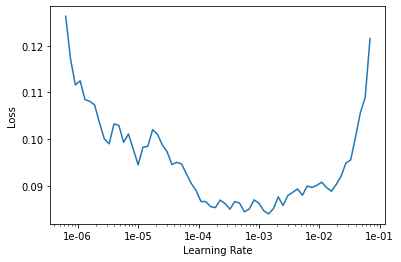

In [0]:
model.lr_find()
model.recorder.plot()

In [0]:
model.fit_one_cycle(4, slice(1e-3, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.095568,0.082431,0.972787,1:56:22
1,0.092031,0.083144,0.970247,1:56:55
2,0.082931,0.082752,0.968795,1:57:09
3,0.081922,0.080292,0.969884,1:57:46


In [0]:
model.save('/content/gdrive/My Drive/Malaria/stage3-exp2-freezed')

In [0]:
from tqdm.notebook import tqdm

test_acc = []
for i in tqdm(range(len(data.test_dl.x))):
    p = model.predict(data.test_dl.x[i])
    test_acc.append(float(max(p[2])))

print('Test Set Accuracy: {:f}%'.format(sum(test_acc)/len(data.test_dl.x)*100))